#Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets




#Loading the sklearn Iris dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [ ]:
iris = datasets.load_iris()
##CODE HERE!!
df = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Flower Type'] = pd.Series(iris.target)
X = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y = df[['Flower Type']]
#Convert dataset to pandas dataframe
#Isolating all data not in the target column
#isolating the target



We can now take a look at what is contained in the X and Y dataframes using the .head() method.

In [ ]:
# call head method on X with 10 rows
X.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# call head method on y
y.head(10)

,Flower Type
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#Data Visualization

We can generate a simple scatterplot with the axes being two features of our dataset, and group it based off the target column or flower type. The goal of our algorithm is to generate a clustering similar to this scatterplot. The key thing to note is that K means clustering is a type of **unsupervised learning** meaning that unlike this scatterplot, it won't know to cluster it based off the flower type.

<Axes: xlabel='Sepal Length', ylabel='Sepal Width'>

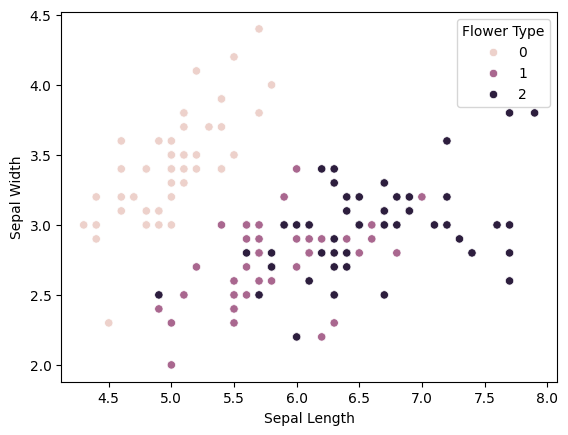

In [ ]:
##create an sns.scatterplot (covered in data preprocessing notebook)
sns.scatterplot(data=df, x = df.columns[0], y = df.columns[1], hue = df.columns[4])
#scatter on columns: sepal length, sepal width
#2nd time through: sepal width, petal length

# Elbow Method

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
K-Means is a sum of squared error.

In [ ]:
#Find optimum number of cluster
sum_squared_error = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X[["Sepal Length", "Sepal Width"]])
    ## add the line to fit the km model here
    #update the sum_squared_error list
    sum_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

We can now implement the "Elbow Method", which allows us to find the number of clusters we should use for the algorithm.
There is a tradeoff here, because as we increase k, the inertia will decrease. The extreme case is when every single point has its own cluster, which means the inertia is zero!!

The Elbow Method allows us to find where the decrease in inertia begins to slow, or where increasing k does not have much more of an impact on the inertia.
(Analogy to overfitting)

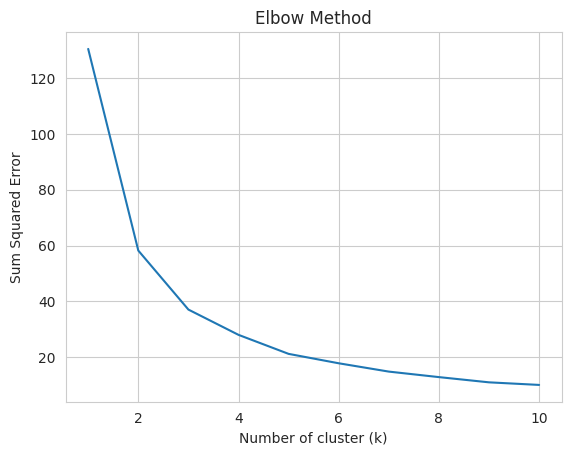

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sum_squared_error)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

From this graph, it seems that we should run a Kmeans algorithm with 3 clusters. We can also try 4 and 5 to see what happens.

In [ ]:
#create the kmeans model
kmeans = KMeans(n_clusters = 3, random_state = 10)
kmeans.fit(X[["Sepal Length", "Sepal Width"]])
#fit on appropriate columns (0,1 or 1,2 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [ ]:
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [ ]:
#create a new column in the dataframe titled "Cluster"
df['Cluster'] = pd.Series(kmeans.labels_)

In [ ]:
##see how the data frame look (what method should we use?)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Flower Type,Cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


from matplotlib import pyplot as plt
_df_0['Sepal Length'].plot(kind='hist', bins=20, title='Sepal Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sepal Width'].plot(kind='hist', bins=20, title='Sepal Width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Petal Length'].plot(kind='hist', bins=20, title='Petal Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Sepal Length', y='Sepal Width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sepal Width', y='Petal Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Petal Width']
  ys = series['Sepal Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Petal Width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Petal Width')
_ = plt.ylabel('Sepal Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Petal Width']
  ys = series['Sepal Width']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Petal Width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Petal Width')
_ = plt.ylabel('Sepal Width')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Petal Width']
  ys = series['Petal Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Petal Width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Petal Width')
_ = plt.ylabel('Petal Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Petal Width']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Petal Width'}, axis=1)
              .sort_values('Petal Width', ascending=True))
  xs = counted['Petal Width']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Petal Width', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Petal Width')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Sepal Length'].plot(kind='line', figsize=(8, 4), title='Sepal Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sepal Width'].plot(kind='line', figsize=(8, 4), title='Sepal Width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Petal Length'].plot(kind='line', figsize=(8, 4), title='Petal Length')
plt.gca().spines[['top', 'right']].set_visible(False)

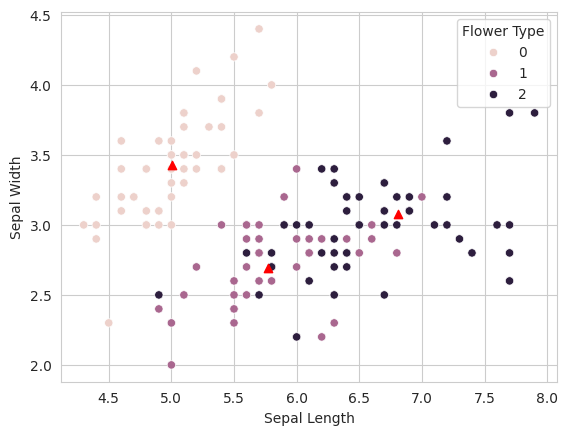

In [ ]:
sns.scatterplot(data=df, x = df.columns[0], y=df.columns[1],  hue=df.columns[4]) # 5--> show how clustering algorithm worked. 4 --> target column
for center in kmeans.cluster_centers_:
  plt.scatter(center[0],center[1],marker = '^',c = 'red')

#4 cluster experimentation

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 10)
kmeans.fit(X[['Sepal Width', 'Petal Length']])

df['Cluster'] = pd.Series(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


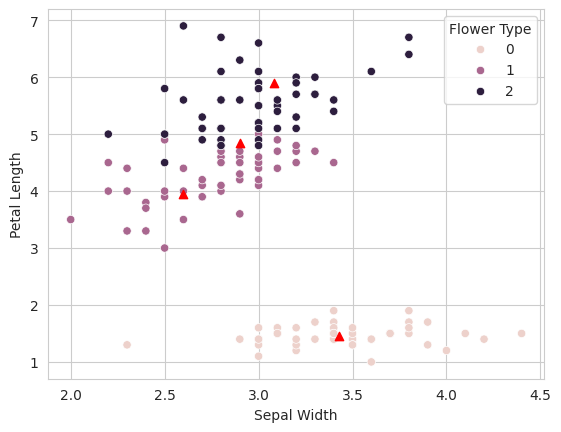

In [ ]:
sns.scatterplot(data=df, x = df.columns[1], y=df.columns[2],  hue=df.columns[4])
for center in kmeans.cluster_centers_:
  plt.scatter(center[0],center[1],marker = '^',c = 'red')